In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import imageio
import matplotlib.pyplot as plt
import scipy.misc
import scipy
from torch.utils.data import DataLoader, TensorDataset
from skimage.transform import resize

x = []
y = []
counter = 0

#read data.txt
with open("07012018/data.txt") as f:
    for line in f:
        x.append("07012018/data/" + line.split()[0]) # Image frame name
       
        y.append(float(line.split()[1].split(',',1)[0]) * scipy.pi / 180) # Steering angle in radians (Normalization)
        counter += 1
        if counter == 1500: 
          break
# counting the no. of image frames.
train_Y = np.asarray(y)
print(train_Y.shape)
No_Imges=len(x)
print(No_Imges)

(1000,)
1000


C:\Users\mshah\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Read The Image From Give Path
train_X_Final= []
for i in range (No_Imges):
    image_read_train = np.array(imageio.imread(x[i]))
    image_read = image_read_train[-150:]
    resized_image_train = (resize(image_read, [66, 200]))
    resized_image_train = resized_image_train.astype("float32")
    resized_image_train /= 255.
    train_X_Final.append(np.array(resized_image_train))
    
train_X_Final=np.array(train_X_Final)
print(train_X_Final.shape)
train_X_Final = train_X_Final.reshape(No_Imges,3, 66, 200)
train_X_Final=torch.from_numpy(train_X_Final.astype(np.float32))
print(train_X_Final.shape)
train_Y=torch.from_numpy(train_Y.astype(np.float32))

C:\Users\mshah\AppData\Local\Temp\ipykernel_15412\3374570732.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_read_train = np.array(imageio.imread(x[i]))


(1000, 66, 200, 3)
torch.Size([1000, 3, 66, 200])


In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1)
        self.pool  = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=3, stride=1)
        self.conv5 = nn.Conv2d(64, 32, kernel_size=3, stride=1)
        self.fc1   = nn.Linear(1216, 64)  # Adjust input size based on your data
        self.fc2   = nn.Linear(64, 10)
        self.fc3   = nn.Linear(10, 1)
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
       # print("x5----=",x.shape)
        x = x.view(x.size(0), -1)
       # print("x----=",x.shape)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        softmax = nn.Softmax(dim=1)
        x=softmax(x)
        x = self.fc3(x)
        return x
#print(model)

In [4]:

model=SimpleCNN() 
learningRate=0.001
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)
BATCH_SIZE = 150
num_Epoch=10

print("train_Y==",train_Y.shape)
dataset = TensorDataset(train_X_Final,train_Y)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
total = 0
correct = 0
train_losses = []
Accuracy = []
for epoch in range(num_Epoch):
    trn_correct=0
    print(f"Epoch {epoch + 1}\n-------------------------------------------------")
    for id_batch, (x_batch, y_batch) in enumerate(dataloader):
        y_pre=model(x_batch)
        loss=criterion(y_pre,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
       
        acc = (y_batch == y_pre).all(axis=1).float().mean()
        
        _, predicted = torch.max(y_pre.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

        accuracy = correct / total
        print("correct==",correct)
        #print("total==",total)
        #print('Accuracy of the network on the test images: %d %%' % (100 * accuracy))
        
        
        ## acc = float(acc)
        
        
        #Predicted = torch.max(y_pre.data,1)[1]
        #print("Predicted==",Predicted)
        
        #batch_Correct=(Predicted==y_batch).sum()
        #trn_correct+=batch_Correct
        #print("trn_correct==",trn_correct)
        #acc = float(acc)
       # Accuracy.append(acc)
    #print(f'Epoch: {epoch},Loss:{loss.item():.6f}')
    
    train_losses.append(loss)
    Accuracy.append(trn_correct)
    #print('Epoch : ',epoch+1,  accuracy {acc})
    #print(f"End of {epoch+1}, accuracy {acc}")

    #if(epoch+1)%10==0:
    #print(f'epoch: {epoch+1},Loss:{loss.item():.4f}')
    # print('Batch : ',id_batch, '\t', 'loss :', loss.item():.4f)

train_Y== torch.Size([1000])
Epoch 1
-------------------------------------------------


C:\Users\mshah\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


correct== 3
correct== 7
correct== 9
correct== 11
correct== 11
correct== 11
correct== 13
correct== 15
correct== 17
correct== 21
correct== 23
correct== 25
correct== 26
correct== 27
correct== 32
correct== 35
correct== 38
correct== 40
correct== 42
correct== 43
correct== 44
correct== 46
correct== 47
correct== 49
correct== 49
correct== 52
correct== 56
correct== 58
correct== 60
correct== 63
correct== 63
correct== 63
Epoch 2
-------------------------------------------------


C:\Users\mshah\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


correct== 65
correct== 67
correct== 69
correct== 73
correct== 75
correct== 78
correct== 79
correct== 82
correct== 89
correct== 91
correct== 93
correct== 94
correct== 96
correct== 97
correct== 98
correct== 99
correct== 103
correct== 104
correct== 106
correct== 107
correct== 108
correct== 111
correct== 113
correct== 114
correct== 118
correct== 119
correct== 120
correct== 121
correct== 121
correct== 124
correct== 126
correct== 126
Epoch 3
-------------------------------------------------
correct== 128
correct== 128
correct== 128
correct== 129
correct== 133
correct== 135
correct== 137
correct== 141
correct== 142
correct== 143
correct== 147
correct== 150
correct== 153
correct== 156
correct== 157
correct== 160
correct== 160
correct== 162
correct== 165
correct== 165
correct== 169
correct== 171
correct== 174
correct== 174
correct== 174
correct== 179
correct== 181
correct== 182
correct== 184
correct== 184
correct== 187
correct== 189
Epoch 4
-------------------------------------------------
corr

In [ ]:
model_scripted = torch.jit.script(model) # Export The Model
model_scripted.save('model_scripted.pt') # Save

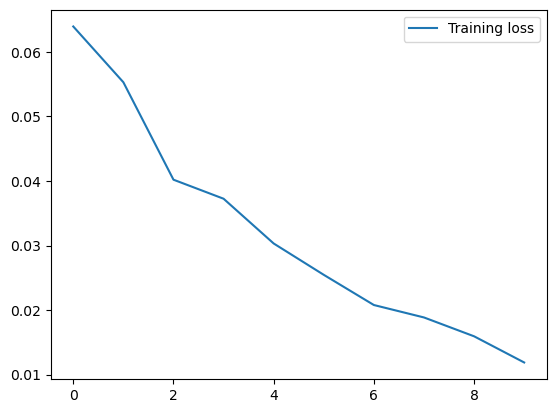

In [13]:
trainingLoss = []
train_losses_np = [tensor.detach().numpy() for tensor in train_losses]
for arr in train_losses_np:
    trainingLoss.append(arr)
plt.plot(trainingLoss, label='Training loss')
plt.legend()
plt.show()

[tensor(45), tensor(45), tensor(45), tensor(45), tensor(45), tensor(45), tensor(45), tensor(45), tensor(45), tensor(45)]


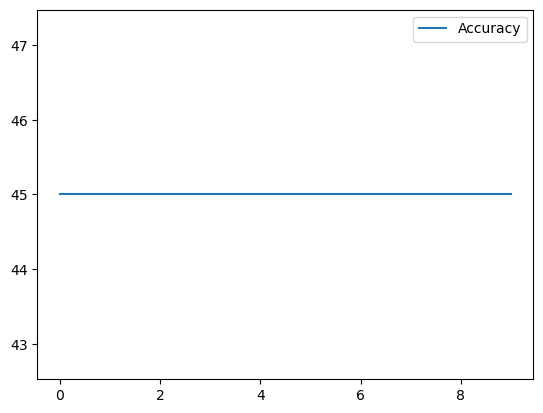

In [14]:
print(Accuracy)
plt.plot(Accuracy, label='Accuracy')
plt.legend()

plt.show()

In [5]:
import torch.nn as nn
pre=nn.Linear(10, 1)
print(pre)

Linear(in_features=10, out_features=1, bias=True)
